<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%202/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo">
</center>

# Data Wrangling

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

*   Handle missing values
*   Correct data format
*   Standardize and normalize data


<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="https://#identify_handle_missing_values">Identify and handle missing values</a>
        <ul>
            <li><a href="https://#identify_missing_values">Identify missing values</a></li>
            <li><a href="https://#deal_missing_values">Deal with missing values</a></li>
            <li><a href="https://#correct_data_format">Correct data format</a></li>
        </ul>
    </li>
    <li><a href="https://#data_standardization">Data standardization</a></li>
    <li><a href="https://#data_normalization">Data normalization (centering/scaling)</a></li>
    <li><a href="https://#binning">Binning</a></li>
    <li><a href="https://#indicator">Indicator variable</a></li>
</ul>

</div>

<hr>


<h2>What is the purpose of data wrangling?</h2>


Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.


<h3>What is the fuel consumption (L/100k) rate for the diesel car?</h3>


<h3>Import data</h3>
<p>
You can find the "Automobile Dataset" from the following link: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01">https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data</a>. 
We will be using this dataset throughout this course.
</p>


<h4>Import pandas</h4> 


If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:


In [1]:
#If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2


In [2]:
import pandas as pd
import matplotlib.pylab as plt

This function will download the dataset into your browser


<h2>Reading the dataset from the URL and adding the related headers</h2>


First, we assign the URL of the dataset to "filename".


This dataset was hosted on IBM Cloud object. Click <a href="https://cocl.us/corsera_da0101en_notebook_bottom?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01">HERE</a> for free storage.


In [3]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

Then, we create a Python list <b>headers</b> containing name of headers.


In [4]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

Use the Pandas method <b>read_csv()</b> to load the data from the web address. Set the parameter  "names" equal to the Python list "headers".


In [6]:
df = pd.read_csv(filename, names = headers)

Use the method <b>head()</b> to display the first five rows of the dataframe.


In [7]:
# To see what the data set looks like, we'll use the head() method.
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


As we can see, several question marks appeared in the dataframe; those are missing values which may hinder our further analysis.

<div>So, how do we identify all those missing values and deal with them?</div> 

<b>How to work with missing data?</b>

Steps for working with missing data:

<ol>
    <li>Identify missing data</li>
    <li>Deal with missing data</li>
    <li>Correct data format</li>
</ol>


<h2 id="identify_handle_missing_values">Identify and handle missing values</h2>

<h3 id="identify_missing_values">Identify missing values</h3>
<h4>Convert "?" to NaN</h4>
In the car dataset, missing data comes with the question mark "?".
We replace "?" with NaN (Not a Number), Python's default missing value marker for reasons of computational speed and convenience. Here we use the function: 
 <pre>.replace(A, B, inplace = True) </pre>
to replace A by B.


In [8]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h4>Evaluating for Missing Data</h4>

The missing values are converted by default. We use the following functions to identify these missing values. There are two methods to detect missing data:

<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.


In [9]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


"True" means the value is a missing value while "False" means the value is not a missing value.


<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the dataset.  In the body of the for loop the method ".value_counts()" counts the number of "True" values. 
</p>


In [10]:
missing_data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [11]:
missing_data.columns.values

array(['symboling', 'normalized-losses', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'], dtype=object)

In [12]:
missing_data.columns.values.tolist()

['symboling',
 'normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [13]:
for column in missing_data.columns.values.tolist():
    print(column)
    
    print (missing_data[column].value_counts()) 
    # value_counts() is a method that can be applied to a pandas Series 
    # to count the occurrences of unique values within that Series. 
    
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Based on the summary above, each column has 205 rows of data and seven of the columns containing missing data:

<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>


**OR**

We can use following function to count total missing values in each column

In [14]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

**value_coutns()**

In [15]:
# importing pandas as pd
import pandas as pd

# Creating the Series
sr = pd.Series(['New York', 'Chicago', 'Toronto', 'Lisbon', 'Rio', 'Chicago', 'Lisbon'])

# Print the series
print(sr)

0    New York
1     Chicago
2     Toronto
3      Lisbon
4         Rio
5     Chicago
6      Lisbon
dtype: object


In [16]:
# find the value counts
sr.value_counts()

Chicago     2
Lisbon      2
New York    1
Toronto     1
Rio         1
dtype: int64

### TRANSCRIPTION: Handling missing values

In this section, we will introduce the pervasive problem of missing values, as well as strategies
on what to do when you encounter missing values in your data.
When no data value is stored for a feature for a particular observation, we say this
feature has a “missing value”.

Usually, missing value in dataset appears as “?”, “N/A”, 0 or just a blank cell.
In the example here, the “normalized-losses” feature has a missing value which is
represented with NaN.

But **how can you deal with missing data?**

There are many ways to deal with missing values, and this is regardless of Python, R, or whatever
tool you use.
Of course, each situation is different and should be judged differently.
However, **these are the typical options you can consider:**

- The first is to check if the person or group that collected the data can go back and find what the actual value should be.
- Another possibility is just to remove the data where that missing value is found.

When you drop data, you can either drop the whole variable or just the single data entry with the missing value. If you don’t have a lot of observations with missing data, usually dropping the particular entry is the best.

If you’re removing data, you want to look to do something that has the least amount
of impact.
Replacing data is better, since no data is wasted.
However, it is less accurate since we need to replace missing data with a guess of what
the data should be.

One standard replacement technique is to replace missing values by the average value of the
entire variable.

As an example, suppose we have some entries that have missing values for the ‘normalized-losses’
column, and the column average for entries with data is 4,500.

While there is no way for us to get an accurate guess of what the missing values under the
‘normalized-losses’ column should have been, you can approximate their values using
the average value of the column, 4,500.

But **what if the values cannot be averaged, as with categorical variables?**

For a variable like ‘fuel-type’, there isn’t an “average” fuel type, since
the variable values are not numbers.
In this case, one possibility is to try using the mode –the most common, like “gasoline”.

Finally, sometimes we may find another way to guess the missing data.
This is usually because the data gatherer knows something additional about the missing
data.

For example, he may know that the missing values tend to be old cars, and the normalized
losses of old cars are significantly higher than the average vehicle.
And of course, finally, in some cases, you may simply want to leave the missing data
as missing data.

For one reason or another, it may be useful to keep that observation, even if some features
are missing.

Now let’s go into how to drop missing values or replace missing values in Python.
To remove data that contains missing values, pandas library has a built-in method called
‘dropna’.

Essentially, with the dropna method, you can choose to drop rows or columns that contain
missing values, like NaN.
So you’ll need to specify “axis=0” to drop the rows, or “axis=1” to drop the
columns that contain the missing values.

In this example, there is a missing value in the “price” column.
Since the price of used cars is what we’re trying to predict in our upcoming analysis,
we’d have to remove the cars –the rows– that don’t have a listed price.
It can simply be done in one line of code using dataframe.dropna().
Setting the argument “inplace” to “true” allows the modification to be done on the
dataset directly.

“Inplace=True” just writes the result back into the dataframe.
This is equivalent to this line of code.
Don’t forget that this line of code does not change the dataframe, but is a good way
to make sure that you are performing the correct operation.
To modify the dataframe, you have to set the parameter "inplace" equal to true.
You should always check the documentation if you are not familiar with a function or
method.

The pandas webpage has lots of useful resources.
To replace missing values like NaNs with actual values, pandas library has a built in method
called ‘replace’, which can be used to fill in the missing values with the newly
calculated values.

As an example, assume that we want to replace the missing values of the variable ‘normalized-losses’
by the mean value of the variable.
Therefore, the missing value should be replaced by the average of the entries within that
Column.

In Python, first we calculate the mean of the column.
Then we use the method “replace”, to specify the value we would like to be replaced as
the first parameter, in this case, NaN.
The second parameter is the value we would like to replace it with: i.e., the mean, in
this example.

This is a fairly simplified way of replacing missing values.
There are of course other techniques, such as replacing missing values for the average
of the group, instead of the entire dataset.

So we’ve gone through two ways in Python to deal with missing data.
We learned to drop problematic rows or columns containing missing values.
And then we learned how to replace missing values with other values.
But don’t forget the other ways to deal with missing data: you can always check for
a higher quality dataset or source.
Or, in some cases, you may want to leave the missing data as missing data.


<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>


Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>

<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>

<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>

<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>


<h4>Calculate the mean value for the "normalized-losses" column </h4>


In [17]:
# astype() method is used to convert the data type of elements in a pandas DataFrame or Series to a specified data type. 

avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


The `axis` parameter is used to specify along which axis the mean operation should be performed. In the case of a DataFrame, `axis=0` refers to operations along the rows (vertically), and `axis=1` refers to operations along the columns (horizontally).

<h4>Replace "NaN" with mean value in "normalized-losses" column</h4>


In [18]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

<h4>Calculate the mean value for the "bore" column</h4>


In [19]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


<h4>Replace "NaN" with the mean value in the "bore" column</h4>


In [20]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1: </h1>

<b>Based on the example above, replace NaN in "stroke" column with the mean value.</b>

</div>


In [21]:
# Write your code below and press Shift+Enter to execute 
avg_stroke = df["stroke"].astype("float").mean(axis=0)
print("Average of stroke:", avg_stroke)

Average of stroke: 3.255422885572139


In [22]:
df["stroke"].replace(np.nan, avg_stroke, inplace=True)

<details><summary>Click here for the solution</summary>

```python
#Calculate the mean vaule for "stroke" column
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)

# replace NaN by mean value in "stroke" column
df["stroke"].replace(np.nan, avg_stroke, inplace = True)
```

</details>


<h4>Calculate the mean value for the "horsepower" column</h4>


In [23]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.25615763546799


<h4>Replace "NaN" with the mean value in the "horsepower" column</h4>


In [24]:
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

<h4>Calculate the mean value for "peak-rpm" column</h4>


In [25]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.369458128079


<h4>Replace "NaN" with the mean value in the "peak-rpm" column</h4>


In [26]:
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

To see which values are present in a particular column, we can use the ".value_counts()" method:


In [27]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

We can see that four doors are the most common type. We can also use the ".idxmax()" method to calculate the most common type automatically:

that is `idmax()` is used to find the index of the first occurrence of the maximum value in a pandas Series.

In [28]:
df['num-of-doors'].value_counts().idxmax()

'four'

The replacement procedure is very similar to what we have seen previously:


In [29]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

Finally, let's drop all rows that do not have price data:


In [30]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

In [31]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [32]:
# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [33]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<b>Good!</b> Now, we have a dataset with no missing values.


<h3 id="correct_data_format">Correct data format</h3>
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use:

<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>


### TRANSCRIPTION: Data with different formats

In this section, we’ll look at the problem of data with different formats, units, and
conventions, and the pandas methods that help us deal with these issues.

Data is usually collected from different places, by different people, which may be stored in
different formats.

Data formatting means bringing data into a common standard of expression that allows
users to make meaningful comparisons.

As a part of dataset cleaning, data formatting ensures that data is consistent and easily
understandable.

For example, people may use different expressions to represent New York City, such as N.Y., Ny,
NY, and New York.

Sometimes, this “uncleaned” data is a good thing to see.

For example, if you’re looking at the different ways people tend to write “New York”,
then this is exactly the data that you want.

Or if you’re looking for ways to spot fraud, perhaps writing “N dot Y dot” is more
likely to predict an anomaly than if someone wrote out “New York” in full.

But perhaps, more often than not, we just simply want to treat them all as the same entity,
or format, to make statistical analyses easier down the road.

Referring to our used car dataset, there’s a feature named “city-mpg” in the dataset,
which refers to a car fuel consumption in miles per gallon unit.

However, you may be someone who lives in a country that uses metric units.
So you would want to convert those values to L/100km --the metric version.


To transform mpg to L/100km we need to divide 235 by each value in the city-mpg column.
In Python, this can easily be done in one line of code.

You take the column and set it equal to 235 divided by the entire column.
In the second line of code, rename column name from "city-mpg" to "city-L/100km" using
the dataframe.rename() method.

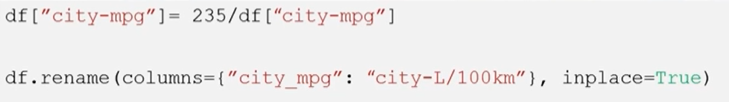

For a number of reasons, including when you import a dataset into Python, the data type
may be incorrectly established.

For example, here we notice that the assigned data type to the `price` feature is “object”
although the expected data type should really be an integer or float type.

It is important for later analysis to explore the feature’s data type and convert them
to the correct data types; otherwise, the developed models later on may behave strangely,
and totally valid data may end up being treated like missing data.

There are many data types in pandas.

- `Objects can be letters or words`.
- Int64 are integers.
- And Floats are real numbers.

There are many others that we will not discuss.

To identify a features data type, in Python we can use the dataframe.dtypes() method and
check the datatype of each variable in a dataframe.

In the case of wrong datatypes, the method dataframe.astype() can be used to convert
a datatype from one format to another.

For example, using astype(“int”) for the price column, you can convert the object column
into an integer type variable.


<h4>Let's list the data types for each column</h4>


In [34]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p>As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.</p> 


<h4>Convert data types to proper format</h4>


In [35]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

<h4>Let us list the columns after the conversion</h4>


In [36]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<b>Wonderful!</b>

Now we have finally obtained the cleaned dataset with no missing values with all data in its proper format.


<h2 id="data_standardization">Data Standardization</h2>
<p>
Data is usually collected from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation.)
</p>

<b>What is standardization?</b>

<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
</p>

<b>Example</b>

<p>Transform mpg to L/100km:</p>
<p>In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accepts the fuel consumption with L/100km standard.</p>
<p>We will need to apply <b>data transformation</b> to transform mpg into L/100km.</p>


<p>The formula for unit conversion is:<p>
L/100km = 235 / mpg
<p>We can do many mathematical operations directly in Pandas.</p>


In [37]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [38]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2: </h1>

<b>According to the example above, transform mpg to L/100km in the column of "highway-mpg" and change the name of column to "highway-L/100km".</b>

</div>


In [39]:
# Write your code below and press Shift+Enter to execute 

# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df["highway-mpg"] = 235/df["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


<details><summary>Click here for the solution</summary>

```python
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df["highway-mpg"] = 235/df["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

# check your transformed data 
df.head()

```

</details>


### TRANSCRIPTION: Normalization

In this section, we’ll be talking about data normalization, an important technique to understand
in data pre-processing.

When we take a look at the used car data set, we notice in the data that the feature “length”
ranges from 150 to 250, while feature “width” and “height” ranges from 50 to 100.

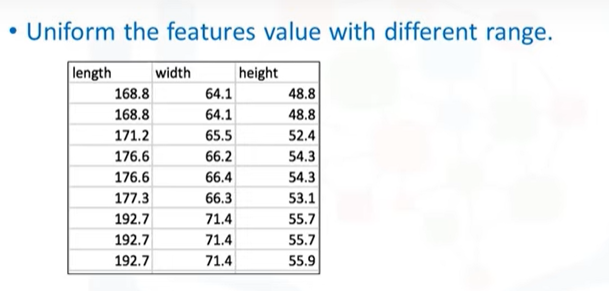

We may want to normalize these variables so that the range of the values is consistent.
This normalization can make some statistical analyses easier down the road.
By making the ranges consistent between variables, normalization enables a fairer comparison
between the different features.

Making sure they have the same impact, it is also important for computational reasons.
Here is another example that will help you understand why normalization is important.

Consider a dataset containing two features: “age” and “income”, where “age”
ranges from 0 to 100, while “income” ranges from 0 to 20,000 and higher.

“income” is about 1,000 times larger than “age”, and ranges from 20,000 to 500,000.
So these two features are in very different ranges.

When we do further analysis, like linear regression, for example, the attribute “income” will
intrinsically influence the result more, due to its larger value, but this doesn’t necessarily
mean it is more ‘important’ as a predictor.

So, the nature of the data biases the linear regression model to weigh income more heavily
than age.
To avoid this, we can normalize these two variables into values that range from 0 to 1.

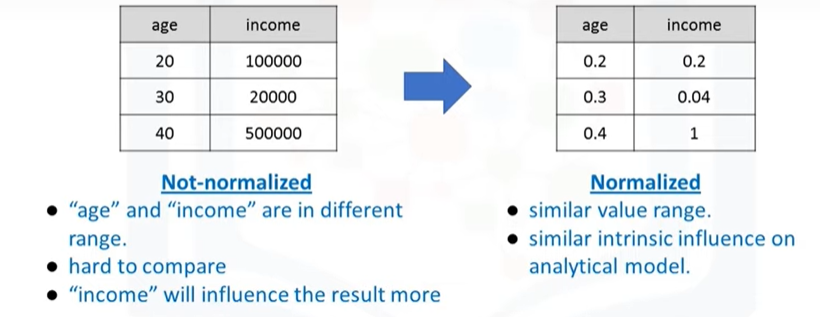

Compare the two tables at the right.
After normalization, both variables now have a similar influence on the models we will
build later.

There are several ways to normalize data.
I will just outline three techniques.

The first method, called “**simple feature scaling**”, just divides each value by the
maximum value for that feature.
This makes the new values range between 0 and 1.

The second method, called “**Min-Max**”, takes each value, X_old, subtracted from the minimum
value of that feature, then divides by the range of that feature.
Again, the resulting new values range between 0 and 1.

The third method is called “**z-score**” or “standard score”.
In this formula, for each value, you subtract the Mu which is the average of the feature,
and then divide by the standard deviation (sigma).
The resulting values hover around 0, and typically range between -3 and +3, but can be higher
or lower.

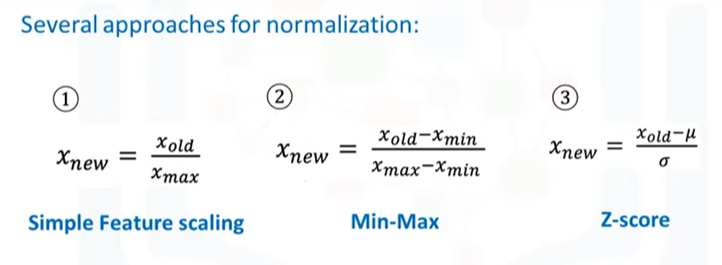

**Following our earlier example, we can apply the normalization method on the “length”
feature:**

First, we use the **simple feature scaling method**, where we divide it by the maximum value in
the feature.
Using the pandas method “max”, this can be done in just one line of code:

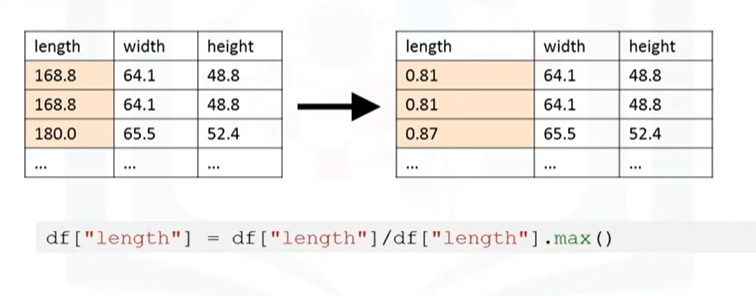

Here’s the **Min-max method** on the “length” feature.
We subtract each value by the minimum of that column, then divide it by the range of that
column: the max minus the min:

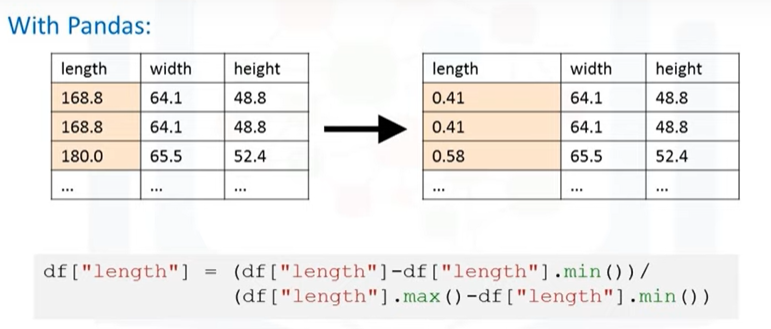

Finally we apply the **Z-score method** on length feature to normalize the values.
Here, we apply the mean() and std() method on the length feature.
mean() method will return the average value of the feature in the dataset, and std() method
will return the standard deviation of the features in the dataset.

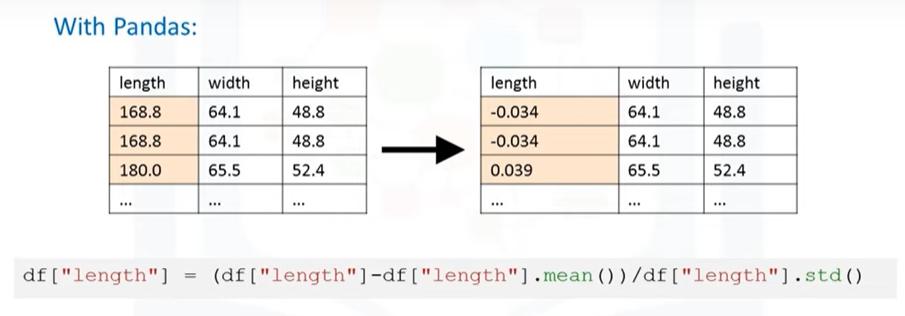

<h2 id="data_normalization">Data Normalization</h2>

<b>Why normalization?</b>

<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.
</p>

<b>Example</b>

<p>To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height".</p>
<p><b>Target:</b> would like to normalize those variables so their value ranges from 0 to 1</p>
<p><b>Approach:</b> replace original value by (original value)/(maximum value)</p>


In [40]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #3: </h1>

<b>According to the example above, normalize the column "height".</b>

</div>


In [41]:
# Write your code below and press Shift+Enter to execute 

df['height'] = df['height']/df['height'].max() 

# show the scaled columns
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


<details><summary>Click here for the solution</summary>

```python
df['height'] = df['height']/df['height'].max() 

# show the scaled columns
df[["length","width","height"]].head()


```

</details>


Here we can see we've normalized "length", "width" and "height" in the range of \[0,1].


### TRANSCRIPTION: Binning

In this section, we’ll talk about **binning as a method of data pre-processing**.

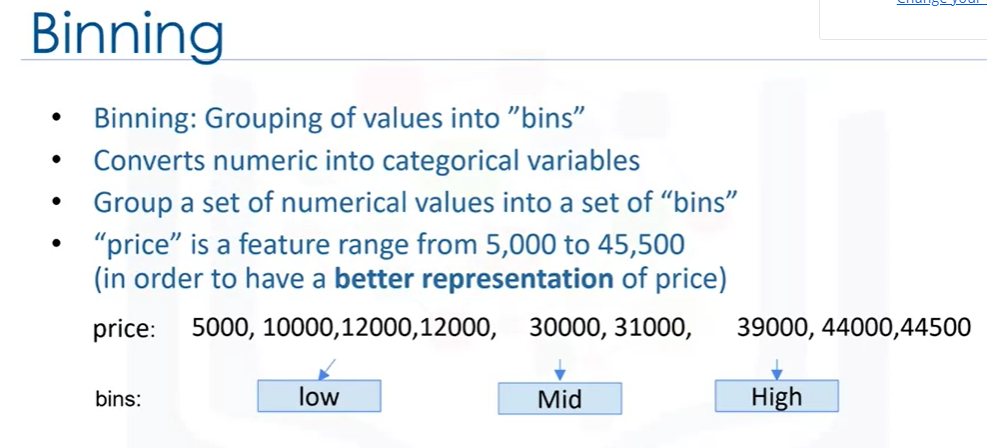

**Binning is when you group values together into bins. For example, you can bin “age”
into [0 to 5], [6 to 10], [11 to 15] and so on.**

**Sometimes, binning can improve accuracy of the predictive models**.
In addition, sometimes we use data binning to group a set of numerical values into a
smaller number of bins to have a better understanding of the data distribution.

As example, “price” here is an attribute range from 5,000 to 45,500.
Using binning, we categorize the price into three bins: low price, medium price, and high
prices.

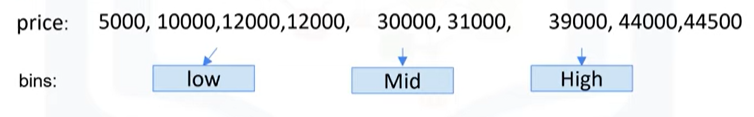

In the actual car dataset, ”price" is a numerical variable ranging from 5188 to 45400,
it has 201 unique values.
We can categorize them into 3 bins: low, medium, and high-priced cars.

In Python we can easily implement the binning: We would like 3 bins of equal binwidth, so
we need 4 numbers as dividers that are equal distance apart.

First we use the numpy function “linspace” to return the array “bins” that contains
4 equally spaced numbers over the specified interval of the price.
We create a list “group_names “ that contains the different bin names.
We use the pandas function ”cut” to segment and sort the data values into bins.

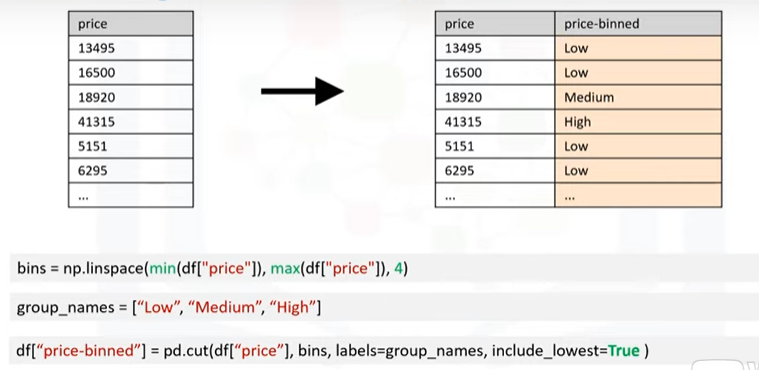

You can then use histograms to visualize the distribution of the data after they’ve been
divided into bins.

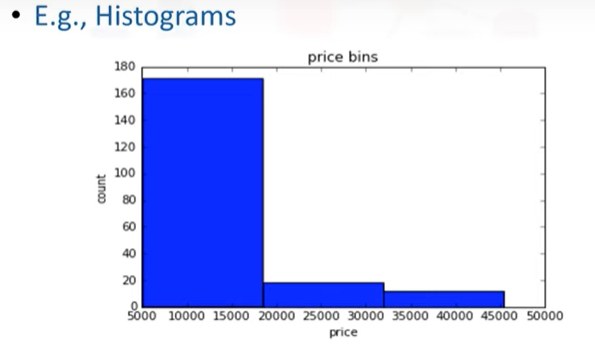

This is the histogram that we plotted based on the binning that we applied in the price
feature.
From the plot, it is clear that most cars have a low price, and only very few cars have
high price.


<h2 id="binning">Binning</h2>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<b>Example: </b>

<p>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the pandas method 'cut' to segment the 'horsepower' column into 3 bins.</p>


<h3>Example of Binning Data In Pandas</h3>


Convert data to correct format:


In [42]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Let's plot the histogram of horsepower to see what the distribution of horsepower looks like.


Text(0.5, 1.0, 'horsepower bins')

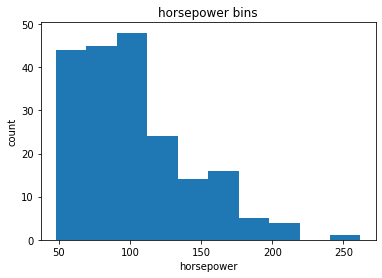

In [43]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<p>We would like 3 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since we want to include the minimum value of horsepower, we want to set start_value = min(df["horsepower"]).</p>
<p>Since we want to include the maximum value of horsepower, we want to set end_value = max(df["horsepower"]).</p>
<p>Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated = 4.</p>


We build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.


In [44]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

We set group  names:


In [45]:
group_names = ['Low', 'Medium', 'High']

We apply the function "cut" to determine what each value of `df['horsepower']` belongs to.


In [58]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins=bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


Let's see the number of vehicles in each bin:


In [47]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

#### Understanding `pd.cut()`

`pd.cut()` is a function in the pandas library in Python that is used for binning numerical data into discrete intervals. This function is particularly useful when you want to categorize or group continuous data into ranges or bins. It is commonly used in data analysis and preprocessing tasks.

In [59]:
import pandas as pd

# Create a sample DataFrame with numerical data
data = {'values': [2, 8, 15, 25, 5, 12, 18]}
dfff = pd.DataFrame(data)

# Define the bins (intervals) for binning
bins = [0, 10, 20, 30]

# Use pd.cut() to categorize the values into bins
dfff['bins'] = pd.cut(dfff['values'], bins)

dfff

,values,bins
0,2,"(0, 10]"
1,8,"(0, 10]"
2,15,"(10, 20]"
3,25,"(20, 30]"
4,5,"(0, 10]"
5,12,"(10, 20]"
6,18,"(10, 20]"


Additionally, you can use the `labels` parameter to assign custom labels to the bins. This is useful when you want to represent the bins with meaningful categories.

In [60]:
# Create a sample DataFrame with numerical data
data = {'values': [2, 8, 15, 25, 5, 12, 18]}
dfff = pd.DataFrame(data)

# Define the bins and labels
bins = [0, 10, 20, 30]
labels = ['Low', 'Medium', 'High']

# Use pd.cut() with custom labels
dfff['categories'] = pd.cut(dfff['values'], bins=bins, labels=labels)

dfff

,values,categories
0,2,Low
1,8,Low
2,15,Medium
3,25,High
4,5,Low
5,12,Medium
6,18,Medium


Let's plot the distribution of each bin:


Text(0.5, 1.0, 'horsepower bins')

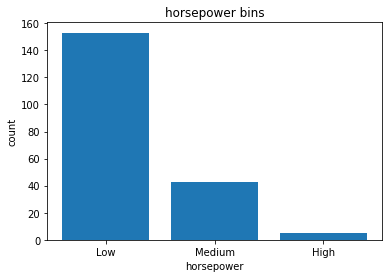

In [48]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<p>
    Look at the dataframe above carefully. You will find that the last column provides the bins for "horsepower" based on 3 categories ("Low", "Medium" and "High"). 
</p>
<p>
    We successfully narrowed down the intervals from 59 to 3!
</p>


<h3>Bins Visualization</h3>
Normally, a histogram is used to visualize the distribution of bins we created above. 


Text(0.5, 1.0, 'horsepower bins')

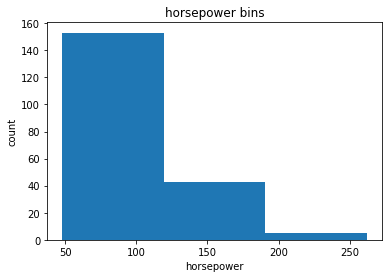

In [49]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

The plot above shows the binning result for the attribute "horsepower".


### TRANSCRIPTION: Categorical variables

In this section, we’ll discuss how to turn categorical variables into quantitative variables
in Python.

Most statistical models cannot take in objects or strings as input and, for model training,
only take the numbers as inputs.

In the car dataset, the "fuel-type" feature as a categorical variable has two values,
"gas" or "diesel”, which are in String format.

For further analysis, Jerry has to convert these variables into some form of numeric
format.
We encode the values by adding new features corresponding to each unique element in the
original feature we would like to encode.

In the case where the feature “Fuel” has two unique values, gas and diesel, we create
two new features ‘gas’ and ‘diesel.'
When a value occurs in the original feature we set the corresponding value to one in the
new feature; the rest of the features are set to zero.

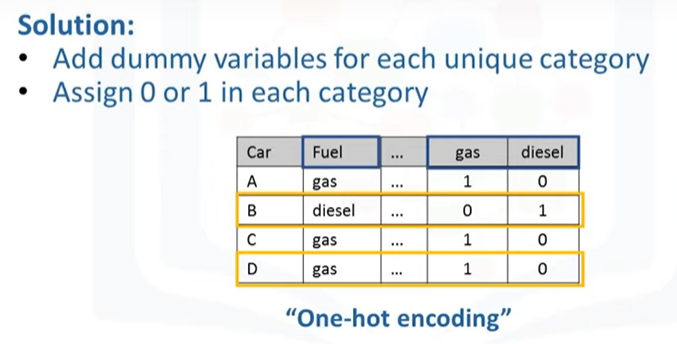

In the fuel example, for car B, the fuel value is diesel.
Therefore, we set the feature diesel equal to one and the gas feature to zero.

Similarly, for car D the fuel value is gas.
Therefore we set the feature gas equal to one and the feature diesel equal to zero.
This technique is often called “**one-hot encoding**”.

In pandas, we can use get_dummies() method to convert categorical variables to dummy
variables.

In Python, transforming categorical variables to dummy variables is simple.
Following the example, pd.get_dummies() method gets the fuel-type column and creates the
dataframe"dummy_variable_1".

The get_dummies() method automatically generates a list of numbers, each one corresponding
to a particular category of the variable.

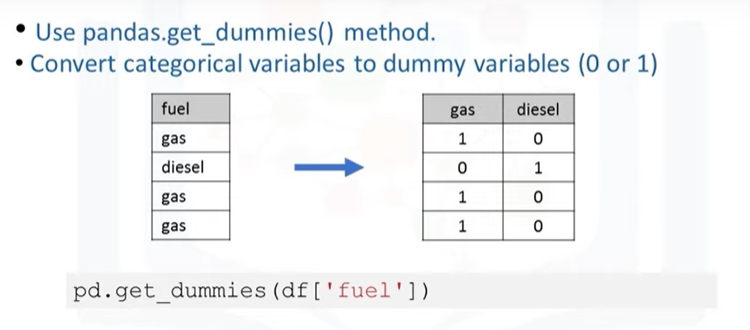

<h2 id="indicator">Indicator Variable (or Dummy Variable)</h2>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>

<p>
    We use indicator variables so we can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    We see the column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" to indicator variables.
</p>

<p>
    We will use pandas' method 'get_dummies' to assign numerical values to different categories of fuel type. 
</p>


In [50]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

Get the indicator variables and assign it to data frame "dummy_variable\_1":


In [51]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Change the column names for clarity:


In [52]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In the dataframe, column 'fuel-type' has values for 'gas' and 'diesel' as 0s and 1s now.


In [53]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [54]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1


The last two columns are now the indicator variable representation of the fuel-type variable. They're all 0s and 1s now.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4: </h1>

<b>Similar to before, create an indicator variable for the column "aspiration"</b>

</div>


In [55]:
# Write your code below and press Shift+Enter to execute 

# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()


,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


<details><summary>Click here for the solution</summary>

```python
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()


```

</details>


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5: </h1>

<b>Merge the new dataframe to the original dataframe, then drop the column 'aspiration'.</b>

</div>


In [56]:
# Write your code below and press Shift+Enter to execute 

# merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)


<details><summary>Click here for the solution</summary>

```python
# merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)


```

</details>


In [57]:
df.to_csv('clean_df.csv')

Save the new csv:

> Note : The  csv file cannot be viewed in the jupyterlite based SN labs environment.However you can Click <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%202/DA0101EN-2-Review-Data-Wrangling.ipynb?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">HERE</a> to download the lab notebook (.ipynb) to your local machine and view the csv file once the notebook is executed.


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>

### Other Contributors

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Mahdi Noorian PhD</a>

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Fiorella Wenver</a>

<a href="https:// https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                  |
| ----------------- | ------- | ---------- | ----------------------------------- |
| 2022-04-22        | 2.3     | Lakshmi    | Made changes in markdown file       |
| 2020-10-30        | 2.2     | Lakshmi    | Changed URL of csv                  |
| 2020-09-09        | 2.1     | Lakshmi    | Updated Indicator Variables section |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab  |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
